# Regularization in Linear Regression

Regularization is a technique that aims to reduce the possibility of model overfitting through a penalty of the cost function. It adds more bias and reduces the variance. Therefore, the model can generalize better.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


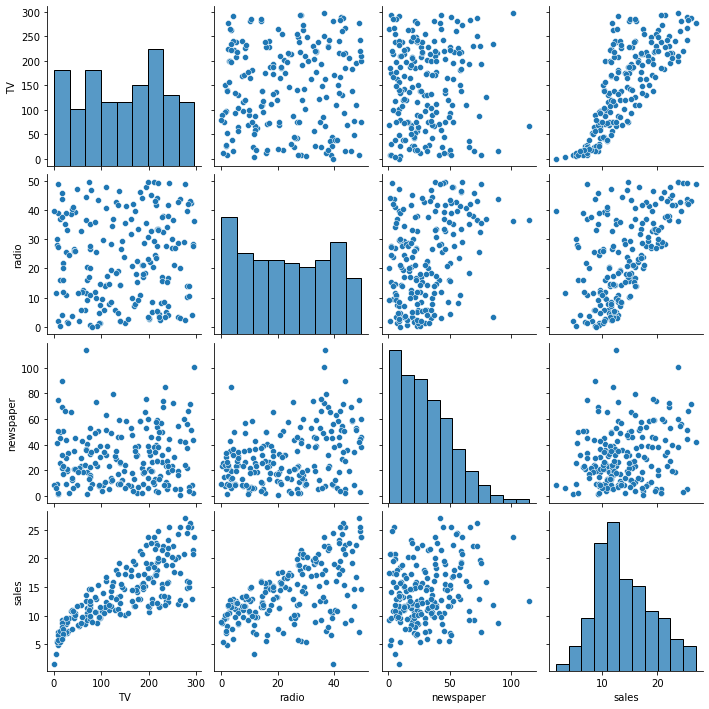

In [4]:
sns.pairplot(df)

## Spliting Features and Label

In [5]:
X = df.drop('sales', axis=1)

In [6]:
y = df['sales']

## Creating Polynomial Features

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
polynomial_converter = PolynomialFeatures(degree=3, include_bias=False)

In [9]:
polynomial_features = polynomial_converter.fit_transform(X)

## Spliting Train set and Test set

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(polynomial_features, y, 
                                                    test_size=0.3,
                                                    random_state=101)

## Scaling the X data

Many machine learning models need that all features to be in the same scale to perform better. For that, we are going to use Standardization (also known as Z-score normalization).

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
scaled_X_train = scaler.fit_transform(X_train)

In [15]:
scaled_X_test = scaler.transform(X_test)

## Ridge Regression - L2 Regularization


The Ridge Regression is a linear regression model that uses L2 regularization.

In L2 regularization, a penalty equal to the square of the magnitude of the coefficients is added to the cost function.

The Ridge model of Scikit-learn has a hyperparameter alpha, that we need to tune to find the best value. 

This alpha value (the sklearn equivalent of lambda), determines how severe is the penalty.

In [16]:
from sklearn.linear_model import Ridge

*In this example we test only an alpha value, since the objective is to show how the ridge model works. Later we will see how to test multiple value of alpha.*

In [17]:
ridge_model = Ridge(alpha=10)

In [18]:
ridge_model.fit(scaled_X_train, y_train)

Ridge(alpha=10)

In [19]:
test_predictions = ridge_model.predict(scaled_X_test)

*Performance Metrics*

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
MAE = mean_absolute_error(y_test, test_predictions)

In [22]:
MAE

0.5774404204714177

In [23]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [24]:
RMSE

0.894638646131968

## Ridge Regression with Cross-Validation

In order to test many alpha values we can use the RidgeCV model. It uses cross-validation, so we can tune the alpha hyperparameter. 

In [25]:
from sklearn.linear_model import RidgeCV

In [26]:
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),
                         scoring='neg_mean_absolute_error')

In [27]:
ridge_cv_model.fit(scaled_X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

We can check what is the best alpha value.

In [28]:
# best alpha
ridge_cv_model.alpha_

0.1

**NOTE:** In the Cross-Validation models of sklearn, we can use scoring metrics to see how well the model perform. To interpret the results of these metrics we need to know that higher the obtained value better is the performance. So, for metrics like mean absolute error, the library uses the negative value of it, so it mantains the pattern of "higher is better".

In [29]:
from sklearn.metrics import SCORERS

In [30]:
# Error metrics where higher is better
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

*The performance of the model*

In [31]:
test_predictions = ridge_cv_model.predict(scaled_X_test)

In [32]:
MAE = mean_absolute_error(y_test, test_predictions)

In [33]:
MAE

0.42737748843313855

In [34]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [35]:
RMSE

0.6180719926906028

We can see that with a different alpha value, we could reduce the error of the model.